# Statistical Inference

$\alpha = \pi^2$

In [6]:
suppressPackageStartupMessages(library(tidyverse))
suppressPackageStartupMessages(library(pwr))

Warning message:
“package ‘dplyr’ was built under R version 3.4.1”

In [122]:
options(repr.plot.width=4, repr.plot.height=3)

## Coin toss experiment

In [106]:
n <- 12
outcomes <- c("H", "T")
tosses <- sample(outcomes, n, replace=TRUE)

In [107]:
tosses

[1] "H" "T" "H" "T" "H" "H" "T" "T" "H" "T" "H" "T"

In [108]:
table(tosses)

tosses
H T 
6 6 

In [109]:
binom.test(table(tosses))


	Exact binomial test

data:  table(tosses)
number of successes = 6, number of trials = 12, p-value = 1
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.2109446 0.7890554
sample estimates:
probability of success 
                   0.5 


### Note on using `dylyr`

Here, using `dplyr` is more complex because of the need to convert to and from a data.matrix. We will stick with basic R but an example is shown below using `dplyr` for those who are curious.

In [110]:
tbl <- data.frame(tosses) %>% count(tosses) %>% select(n)
binom.test(as.matrix(tbl))


	Exact binomial test

data:  as.matrix(tbl)
number of successes = 6, number of trials = 12, p-value = 1
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.2109446 0.7890554
sample estimates:
probability of success 
                   0.5 


**Exercise 1** 

Repeat the coin toss experiment with 10 tosses and evaluate if the results are statistically significant.

**Exercise 2**

Repeat the coin toss experiment with 12 tosses, but set the probability of HEADS to be 0.3 and evaluate if the results are statistically significant.

**Exercise 3**

Create a data sample with 2 HEADS and 10 TAILS and evaluate if the results are statistically significant.

## A two-sample model

### Simulation

In [113]:
mu1 <- 0
mu2 <- 2
sigma <- 5
n <- 12

In [114]:
x1 <- rnorm(n, mu1, sigma)
x2 <- rnorm(n, mu2, sigma)

In [115]:
t.test(x=x1, y=x2)


	Welch Two Sample t-test

data:  x1 and x2
t = -0.38018, df = 21.96, p-value = 0.7075
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -5.320465  3.672143
sample estimates:
mean of x mean of y 
 1.036991  1.861152 


### Sample size calculation

In [116]:
d <- abs(mu1 - mu2)/sigma

In [117]:
alpha <- 0.05
power <- 0.8

In [118]:
pwr.t.test(d=d, sig.level=alpha, power=power)


     Two-sample t test power calculation 

              n = 99.08032
              d = 0.4
      sig.level = 0.05
          power = 0.8
    alternative = two.sided

NOTE: n is number in *each* group


**Exercise**

- Suppose that company XYZ Dairies sells milk in glass bottles
- The company claims that the net content of each bottle is 1 gallon
- Mr. Smith, owner of the ABC Supermarket, suspects he, and ultimately his customers, are being swindled by XYZ
- Let μ denote the mean net content (in gallons) of the population of XYZ Dairies milk bottles
- The company claims μ = 1
- Mr. Smith hypothesizes that μ < 1
- Mr. Smith has to give benefit of the doubt to company XYZ’s claim (i.e., μ = 1)
- The purpose of the experiment is to ascertain if there is sufficient evidence to the contrary (i.e., show μ $\ne$ 1)
- The null hypothesis is formulated as H0 : μ = 1
- The alternative is formulated as H1 : μ$\ne$ 1
- Mr. Smith has no interest in gathering evidence for showing that XYZ overfills its bottles (i.e., μ > 1)

**Exercise 4**

Suppose the true value of $\mu$ is 0.9. Simulate 20 samples each from the null distribution and the true distribution. Evaluate if the samples are statistically significant using a one-sided two sample T test.

**Exercise 5**

Suppose the true value of $\mu$ is 0.9. How many samples would be needed in each group to have a power of 0.9 at an alpha of 0.1 with a one-sided t-test?

## Distribution of p-values under null distribution

In [119]:
mu1 <- 0
mu2 <- 0
sigma <- 5
n <- 12
r <- 1000

In [120]:
ps <- numeric(r)
for (rep in 1:r) {
    x1 <- rnorm(n, mu1, sigma)
    x2 <- rnorm(n, mu2, sigma)
    ps[rep] <- t.test(x=x1, y=x2)$p.value
}

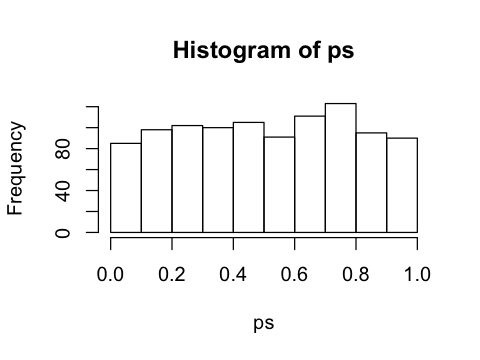

In [123]:
hist(ps)

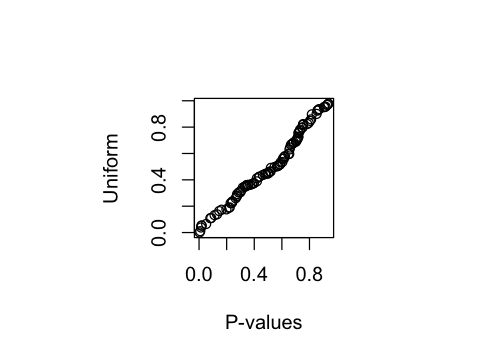

In [129]:
par(pty="s")
qqplot(ps[1:100], runif(length(ps[1:100])), ylab="Uniform", xlab="P-values")

**Exercise 6**

Plot the histogram of p-values and the QQ-plot when mu2 = 2.